In [1]:
# Importing Library -------------%%%%

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns



In [2]:
 Authenticating Users ------------%%%%%%
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [3]:



downloaded = drive.CreateFile({'id':'1H3Dpt2nkyFhpap7CuATl_YGi2dXJFS7z'}) # replace the id with id of file you want to access
downloaded.GetContentFile('tv.csv')

downloaded = drive.CreateFile({'id':'1sYMrQB_ViWlhUAkBA_znHSZLxDPHIQBh'}) # replace the id with id of file you want to access
downloaded.GetContentFile('temp_data.csv')

In [4]:
#imporing capitalbikeshare-tripdata dataset
temp = pd.read_csv("temp_data.csv") 
temp.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,WS50M_RANGE,WS10M_RANGE
0,39.07271,-76.98409,2020,1,1,0.00,3.12,70.76,99.90,8.02,1.35,-2.70,-2.64,7.11,-0.91,2.02,4.67,4.39
1,39.07271,-76.98409,2020,1,2,0.01,4.09,86.33,100.20,9.68,2.23,0.97,0.77,7.90,-1.78,3.05,5.88,1.73
2,39.07271,-76.98409,2020,1,3,6.28,6.55,96.38,99.80,6.49,7.72,7.61,7.59,12.00,5.51,8.17,5.32,2.81
3,39.07271,-76.98409,2020,1,4,6.11,7.00,95.56,99.33,10.09,8.64,8.51,8.33,14.77,4.68,9.20,7.27,5.43
4,39.07271,-76.98409,2020,1,5,0.03,3.03,69.01,100.38,5.19,1.67,-3.04,-3.02,4.63,-0.56,2.01,11.63,8.55


In [5]:
#imporing capitalbikeshare-tripdata dataset
df = pd.read_csv("tv.csv") 
df.head()

,Unnamed: 0,Unnamed: 0.1,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR
0,0,0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,31287.0,1223.0,22.0,8.0,2020.0
1,1,1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,31271.0,287.0,26.0,8.0,2020.0
2,2,2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,32014.0,2338.0,7.0,8.0,2020.0
3,3,3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,31528.0,833.0,7.0,8.0,2020.0
4,4,4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,31122.0,513.0,18.0,8.0,2020.0


In [6]:
s1 = df.query('start_station_id == 31131')
s1 = s1.sort_values(by=['DY'])
s1 = pd.DataFrame(s1)
s1 = s1.reset_index()
s1

,index,Unnamed: 0,Unnamed: 0.1,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR
0,299374,299374,299374,8118310677A1568A,electric_bike,2020-10-01 17:21:34,31131.0,1494.0,1.0,10.0,2020.0
1,447234,447234,447234,6235AA96EC4B3342,electric_bike,2020-12-01 10:38:58,31131.0,777.0,1.0,12.0,2020.0
2,453615,453615,453615,8671DC9C3EC477F3,docked_bike,2020-12-01 18:25:15,31131.0,268.0,1.0,12.0,2020.0
3,36173,36173,36173,943D996273DC6043,docked_bike,2020-08-01 00:03:30,31131.0,2426.0,1.0,8.0,2020.0
4,36019,36019,36019,E43D340103773E59,docked_bike,2020-08-01 21:42:15,31131.0,2295.0,1.0,8.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
1403,246055,246055,246055,3352CFAEFC8ACD69,docked_bike,2020-10-31 16:29:27,31131.0,1098.0,31.0,10.0,2020.0
1404,304533,304533,304533,8FBC536C2E61A697,electric_bike,2020-10-31 19:24:54,31131.0,921.0,31.0,10.0,2020.0
1405,79460,79460,79460,3AD9B5A6FAA680E1,electric_bike,2020-08-31 09:10:48,31131.0,453.0,31.0,8.0,2020.0
1406,306367,306367,306367,ACF1D06A305CED38,electric_bike,2020-10-31 22:28:56,31131.0,1413.0,31.0,10.0,2020.0


In [7]:
result = pd.merge(s1, temp, how='left', on=['DY', 'MO','YEAR'])
result


,index,Unnamed: 0,Unnamed: 0.1,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR,LAT,LON,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,WS50M_RANGE,WS10M_RANGE
0,299374,299374,299374,8118310677A1568A,electric_bike,2020-10-01 17:21:34,31131.0,1494.0,1.0,10.0,2020.0,39.07271,-76.98409,2.51,8.18,68.46,100.16,10.40,17.06,11.04,10.78,22.21,11.81,16.79,6.68,4.02
1,447234,447234,447234,6235AA96EC4B3342,electric_bike,2020-12-01 10:38:58,31131.0,777.0,1.0,12.0,2020.0,39.07271,-76.98409,0.11,3.89,78.08,99.43,4.72,3.82,0.21,0.09,6.16,1.44,3.66,4.70,5.63
2,453615,453615,453615,8671DC9C3EC477F3,docked_bike,2020-12-01 18:25:15,31131.0,268.0,1.0,12.0,2020.0,39.07271,-76.98409,0.11,3.89,78.08,99.43,4.72,3.82,0.21,0.09,6.16,1.44,3.66,4.70,5.63
3,36173,36173,36173,943D996273DC6043,docked_bike,2020-08-01 00:03:30,31131.0,2426.0,1.0,8.0,2020.0,39.07271,-76.98409,1.71,15.53,70.06,100.14,9.68,27.89,21.05,20.91,31.55,21.88,26.85,6.75,4.50
4,36019,36019,36019,E43D340103773E59,docked_bike,2020-08-01 21:42:15,31131.0,2295.0,1.0,8.0,2020.0,39.07271,-76.98409,1.71,15.53,70.06,100.14,9.68,27.89,21.05,20.91,31.55,21.88,26.85,6.75,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,246055,246055,246055,3352CFAEFC8ACD69,docked_bike,2020-10-31 16:29:27,31131.0,1098.0,31.0,10.0,2020.0,39.07271,-76.98409,0.14,4.10,72.50,101.85,8.58,6.87,1.30,1.18,10.13,1.55,5.82,7.18,3.44
1404,304533,304533,304533,8FBC536C2E61A697,electric_bike,2020-10-31 19:24:54,31131.0,921.0,31.0,10.0,2020.0,39.07271,-76.98409,0.14,4.10,72.50,101.85,8.58,6.87,1.30,1.18,10.13,1.55,5.82,7.18,3.44
1405,79460,79460,79460,3AD9B5A6FAA680E1,electric_bike,2020-08-31 09:10:48,31131.0,453.0,31.0,8.0,2020.0,39.07271,-76.98409,7.10,12.33,80.48,100.51,5.10,20.75,17.36,17.29,23.45,18.35,20.80,2.39,1.63
1406,306367,306367,306367,ACF1D06A305CED38,electric_bike,2020-10-31 22:28:56,31131.0,1413.0,31.0,10.0,2020.0,39.07271,-76.98409,0.14,4.10,72.50,101.85,8.58,6.87,1.30,1.18,10.13,1.55,5.82,7.18,3.44


In [8]:
s10 = df.query('start_station_id == 31233')
s10 = s10.sort_values(by=['DY'])
s10 = pd.DataFrame(s10)
s10 = s10.reset_index()
s10.head()

,index,Unnamed: 0,Unnamed: 0.1,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR
0,132213,132213,132213,BD6BFF57DDE40447,docked_bike,2020-09-01 22:06:42,31233.0,1778.0,1.0,9.0,2020.0
1,247692,247692,247692,EDAC85D8DC5DEA56,docked_bike,2020-10-01 17:53:20,31233.0,1079.0,1.0,10.0,2020.0
2,150331,150331,150331,FFC0780874C69228,docked_bike,2020-09-01 14:14:03,31233.0,557.0,1.0,9.0,2020.0
3,127406,127406,127406,CCAE8ECC7860399C,docked_bike,2020-09-01 22:07:18,31233.0,1736.0,1.0,9.0,2020.0
4,250177,250177,250177,592D38EB584B56C4,docked_bike,2020-10-01 12:57:58,31233.0,804.0,1.0,10.0,2020.0


In [9]:
s6 =s1.groupby(["rideable_type","DY"])
s6

In [10]:
sa =result.groupby(["DY","MO","PS","T2M_RANGE","T2M_MAX","T2M_MIN","RH2M","rideable_type","WS50M_RANGE","T2MDEW","T2M","QV2M"]).size()
s5 = []
s6 = []
sa = pd.DataFrame(sa,columns=['count'])
modified = sa.reset_index()
a = 0
for i in range(len(modified)):
  if(modified['rideable_type'][i] == 'docked_bike'):
    s5.append(modified['count'][i])
    s6.append(a)
  else:
    s6.append(modified['count'][i])
    s5.append(a)
print(s6)
print(s5)
sb = s1[['DY','MO','time_to_travel']]
modified['docked_b'] = s5
modified['electric_b'] = s6
#modified = pd.merge(modified, sb, how="left", on=["DY", "MO"])
#sb
modified

[0, 5, 0, 4, 0, 4, 0, 8, 0, 1, 0, 6, 0, 3, 0, 7, 0, 2, 0, 0, 7, 0, 2, 0, 4, 0, 6, 0, 4, 0, 5, 0, 3, 0, 3, 0, 6, 0, 4, 0, 4, 0, 8, 0, 3, 0, 3, 0, 2, 0, 1, 0, 7, 0, 2, 0, 6, 0, 2, 0, 9, 0, 7, 0, 3, 0, 6, 0, 1, 0, 21, 0, 7, 0, 5, 0, 12, 0, 1, 0, 5, 12, 0, 5, 0, 4, 0, 6, 0, 9, 0, 5, 0, 13, 0, 6, 0, 4, 0, 6, 0, 3, 0, 2, 0, 3, 5, 0, 10, 0, 4, 0, 4, 0, 5, 0, 9, 0, 5, 0, 9, 0, 3, 0, 5, 4, 0, 7, 0, 2, 0, 5, 0, 3, 1, 0, 11, 0, 8, 0, 6, 0, 6, 0, 3, 0, 4, 0, 9, 0, 7, 0, 5, 2, 0, 6, 0, 5, 0, 6, 0, 4, 4, 0, 6, 0, 4, 0, 12, 0, 4, 4, 0, 1, 0, 7, 0, 4, 4, 0, 3, 0, 5, 0, 17, 0, 14, 0, 2, 5, 0, 3, 0, 5, 0, 8, 0, 7, 6, 0, 4, 0, 9, 0, 3, 0, 6, 1, 0, 2, 0, 10, 0, 4, 0, 4, 5, 0, 5, 0, 2, 0, 6, 0, 3, 1, 0, 7, 0, 4, 2, 0, 6, 6, 0, 5, 0, 5, 0, 9, 0, 5, 6, 0, 3, 0, 4, 0, 3, 0, 2, 5, 0, 6, 0, 5, 0, 2, 0, 1, 6, 0, 5, 0, 5, 0, 2, 0, 5, 4, 0, 6, 0, 8, 0, 4, 0, 8, 5, 0, 3, 0, 6, 2]
[7, 0, 6, 0, 8, 0, 2, 0, 6, 0, 4, 0, 5, 0, 4, 0, 2, 0, 10, 3, 0, 5, 0, 12, 0, 6, 0, 5, 0, 2, 0, 4, 0, 2, 0, 2, 0, 6, 0, 6, 0, 9, 0, 4, 0,

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,rideable_type,WS50M_RANGE,T2MDEW,T2M,QV2M,count,docked_b,electric_b
0,1.0,8.0,100.14,9.68,31.55,21.88,70.06,docked_bike,6.75,21.05,26.85,15.53,7,7,0
1,1.0,8.0,100.14,9.68,31.55,21.88,70.06,electric_bike,6.75,21.05,26.85,15.53,5,0,5
2,1.0,9.0,100.56,7.80,26.47,18.67,85.16,docked_bike,2.27,19.74,22.34,14.35,6,6,0
3,1.0,9.0,100.56,7.80,26.47,18.67,85.16,electric_bike,2.27,19.74,22.34,14.35,4,0,4
4,1.0,10.0,100.16,10.40,22.21,11.81,68.46,docked_bike,6.68,11.04,16.79,8.18,8,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,31.0,8.0,100.51,5.10,23.45,18.35,80.48,docked_bike,2.39,17.36,20.80,12.33,1,1,0
280,31.0,8.0,100.51,5.10,23.45,18.35,80.48,electric_bike,2.39,17.36,20.80,12.33,3,0,3
281,31.0,10.0,101.85,8.58,10.13,1.55,72.50,docked_bike,7.18,1.30,5.82,4.10,2,2,0
282,31.0,10.0,101.85,8.58,10.13,1.55,72.50,electric_bike,7.18,1.30,5.82,4.10,6,0,6


In [11]:
 modified.reset_index(inplace=True, drop=True)
modified.sort_values(['DY', 'MO'], ascending=[True, False])


,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,rideable_type,WS50M_RANGE,T2MDEW,T2M,QV2M,count,docked_b,electric_b
8,1.0,12.0,99.43,4.72,6.16,1.44,78.08,docked_bike,4.70,0.21,3.66,3.89,6,6,0
9,1.0,12.0,99.43,4.72,6.16,1.44,78.08,electric_bike,4.70,0.21,3.66,3.89,1,0,1
6,1.0,11.0,100.38,11.16,14.52,3.36,86.56,docked_bike,6.63,6.88,9.02,6.19,2,2,0
7,1.0,11.0,100.38,11.16,14.52,3.36,86.56,electric_bike,6.63,6.88,9.02,6.19,8,0,8
4,1.0,10.0,100.16,10.40,22.21,11.81,68.46,docked_bike,6.68,11.04,16.79,8.18,8,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,31.0,12.0,101.09,5.42,4.74,-0.68,93.72,electric_bike,5.56,2.06,3.00,4.38,2,0,2
281,31.0,10.0,101.85,8.58,10.13,1.55,72.50,docked_bike,7.18,1.30,5.82,4.10,2,2,0
282,31.0,10.0,101.85,8.58,10.13,1.55,72.50,electric_bike,7.18,1.30,5.82,4.10,6,0,6
279,31.0,8.0,100.51,5.10,23.45,18.35,80.48,docked_bike,2.39,17.36,20.80,12.33,1,1,0


In [12]:
df1 = modified[modified['rideable_type'] == 'docked_bike']
df1 = df1.drop(['rideable_type','count', 'electric_b'], axis=1)
df1

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,WS50M_RANGE,T2MDEW,T2M,QV2M,docked_b
0,1.0,8.0,100.14,9.68,31.55,21.88,70.06,6.75,21.05,26.85,15.53,7
2,1.0,9.0,100.56,7.80,26.47,18.67,85.16,2.27,19.74,22.34,14.35,6
4,1.0,10.0,100.16,10.40,22.21,11.81,68.46,6.68,11.04,16.79,8.18,8
6,1.0,11.0,100.38,11.16,14.52,3.36,86.56,6.63,6.88,9.02,6.19,2
8,1.0,12.0,99.43,4.72,6.16,1.44,78.08,4.70,0.21,3.66,3.89,6
...,...,...,...,...,...,...,...,...,...,...,...,...
272,30.0,9.0,99.73,9.32,21.10,11.78,72.31,3.46,11.06,15.97,8.23,6
274,30.0,10.0,100.21,5.72,11.62,5.90,83.46,4.29,5.96,8.61,5.82,6
276,30.0,11.0,98.90,13.19,18.73,5.55,97.82,8.18,11.71,12.06,8.72,2
279,31.0,8.0,100.51,5.10,23.45,18.35,80.48,2.39,17.36,20.80,12.33,1


In [13]:
df2 = modified[modified['rideable_type'] == 'electric_bike']
df2 = df2.drop(['rideable_type','count', 'docked_b'], axis=1)
df2

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,WS50M_RANGE,T2MDEW,T2M,QV2M,electric_b
1,1.0,8.0,100.14,9.68,31.55,21.88,70.06,6.75,21.05,26.85,15.53,5
3,1.0,9.0,100.56,7.80,26.47,18.67,85.16,2.27,19.74,22.34,14.35,4
5,1.0,10.0,100.16,10.40,22.21,11.81,68.46,6.68,11.04,16.79,8.18,4
7,1.0,11.0,100.38,11.16,14.52,3.36,86.56,6.63,6.88,9.02,6.19,8
9,1.0,12.0,99.43,4.72,6.16,1.44,78.08,4.70,0.21,3.66,3.89,1
...,...,...,...,...,...,...,...,...,...,...,...,...
277,30.0,11.0,98.90,13.19,18.73,5.55,97.82,8.18,11.71,12.06,8.72,8
278,30.0,12.0,101.57,5.46,3.18,-2.28,82.34,6.36,-2.06,0.61,3.23,5
280,31.0,8.0,100.51,5.10,23.45,18.35,80.48,2.39,17.36,20.80,12.33,3
282,31.0,10.0,101.85,8.58,10.13,1.55,72.50,7.18,1.30,5.82,4.10,6


In [14]:
df1['PS'] = df1['PS'] - 100
modified = df1
modified

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,WS50M_RANGE,T2MDEW,T2M,QV2M,docked_b
0,1.0,8.0,0.14,9.68,31.55,21.88,70.06,6.75,21.05,26.85,15.53,7
2,1.0,9.0,0.56,7.80,26.47,18.67,85.16,2.27,19.74,22.34,14.35,6
4,1.0,10.0,0.16,10.40,22.21,11.81,68.46,6.68,11.04,16.79,8.18,8
6,1.0,11.0,0.38,11.16,14.52,3.36,86.56,6.63,6.88,9.02,6.19,2
8,1.0,12.0,-0.57,4.72,6.16,1.44,78.08,4.70,0.21,3.66,3.89,6
...,...,...,...,...,...,...,...,...,...,...,...,...
272,30.0,9.0,-0.27,9.32,21.10,11.78,72.31,3.46,11.06,15.97,8.23,6
274,30.0,10.0,0.21,5.72,11.62,5.90,83.46,4.29,5.96,8.61,5.82,6
276,30.0,11.0,-1.10,13.19,18.73,5.55,97.82,8.18,11.71,12.06,8.72,2
279,31.0,8.0,0.51,5.10,23.45,18.35,80.48,2.39,17.36,20.80,12.33,1


In [15]:
modified.corr()

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,WS50M_RANGE,T2MDEW,T2M,QV2M,docked_b
DY,1.000000,-0.172152,-0.063592,0.019183,0.032703,0.025834,0.152020,-0.067484,0.073608,0.035098,0.038676,-0.226833
MO,-0.172152,1.000000,0.256603,0.100245,-0.876840,-0.891898,0.221313,0.149491,-0.811397,-0.903732,-0.813181,0.080980
PS,-0.063592,0.256603,1.000000,0.236363,-0.279757,-0.351075,-0.189577,0.005269,-0.372534,-0.331334,-0.398756,0.044303
T2M_RANGE,0.019183,0.100245,0.236363,1.000000,0.103880,-0.223799,-0.392239,0.150810,-0.178483,-0.067213,-0.261263,0.117019
T2M_MAX,0.032703,-0.876840,-0.279757,0.103880,1.000000,0.946114,-0.068118,-0.162703,0.928612,0.983560,0.889448,-0.063619
T2M_MIN,0.025834,-0.891898,-0.351075,-0.223799,0.946114,1.000000,0.060960,-0.208450,0.968098,0.985717,0.956660,-0.100508
RH2M,0.152020,0.221313,-0.189577,-0.392239,-0.068118,0.060960,1.000000,-0.146668,0.264789,-0.009767,0.261966,-0.305012
WS50M_RANGE,-0.067484,0.149491,0.005269,0.150810,-0.162703,-0.208450,-0.146668,1.000000,-0.222468,-0.187277,-0.240712,-0.014602
T2MDEW,0.073608,-0.811397,-0.372534,-0.178483,0.928612,0.968098,0.264789,-0.222468,1.000000,0.961349,0.976435,-0.156516
T2M,0.035098,-0.903732,-0.331334,-0.067213,0.983560,0.985717,-0.009767,-0.187277,0.961349,1.000000,0.936176,-0.078853


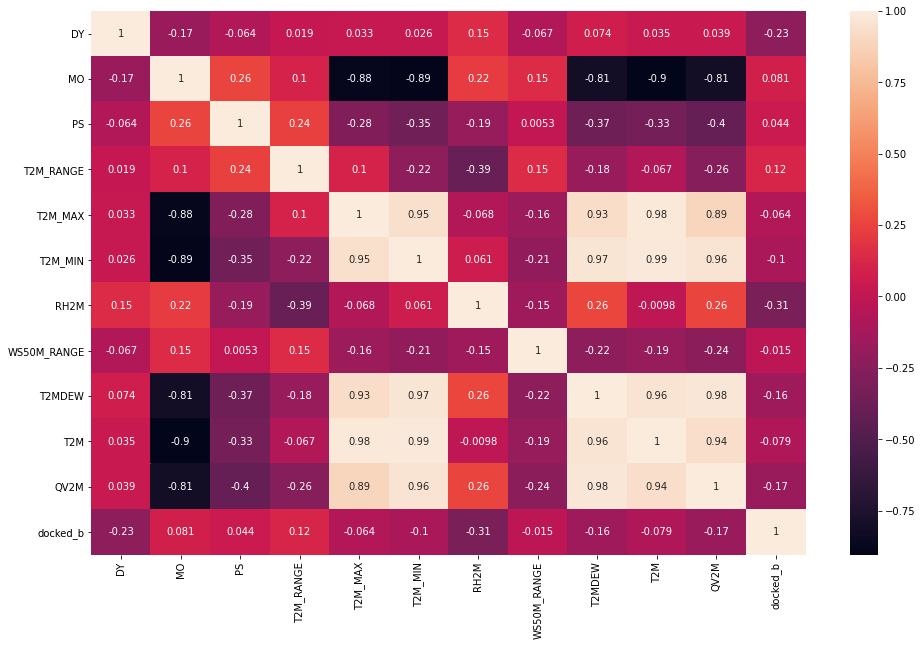

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(modified.corr(), annot=True)
plt.show()

In [17]:
docked_count = modified['docked_b'].sum()
print (docked_count)
electric_count = df2['electric_b'].sum()
print (electric_count)


623
785


In [18]:
index = modified.index
number_of_rows = len(index)
number_of_rows

132

In [19]:
from sklearn.svm import SVC
!pip3 install quandl
!pip3 install sklearn
import quandl, math
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

In [20]:

X = modified.drop(['docked_b'], 1)
y = modified['docked_b']

In [21]:
X = np.array(X)
y = np.array(y)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=20)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [25]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.1333333333333333
Mean Squared Error: 7.350370370370371
Root Mean Squared Error: 2.7111566480693017


In [26]:
#X = preprocessing.scale(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=20)

In [28]:
clf = LinearRegression()

In [29]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred = np.ceil(y_pred)
y_pred

array([6., 5., 5., 5., 5., 5., 6., 7., 5., 5., 5., 5., 3., 3., 4., 7., 6.,
       6., 4., 4., 4., 6., 6., 4., 5., 6., 6.])

In [30]:
y_test

array([4, 7, 4, 9, 7, 1, 6, 4, 5, 6, 6, 3, 2, 6, 3, 8, 4, 7, 8, 9, 4, 6,
       5, 2, 9, 3, 6])

In [31]:
#To retrieve the intercept:
print(clf.intercept_)

#For retrieving the slope:
print(clf.coef_)

37.25369086409941
[-5.27294663e-02  6.45457323e-01 -2.86179599e-02 -7.99856934e+01
  7.97334229e+01 -8.02095887e+01 -4.00203570e-01 -1.99513568e-01
  1.73727390e+00 -1.00607177e+00 -2.92864330e-01]


In [32]:
from sklearn.metrics import mean_squared_log_error
msleDT=mean_squared_log_error(y_pred,y_test)
rmsleLR=np.sqrt(msleDT)
print('RMLSE for the data:',rmsleLR)

RMLSE for the data: 0.4077083035461604


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['docked_b'], 1))
  y_train = np.array(x['docked_b'])
  X_test = np.array(y.drop(['docked_b'], 1))
  y_test = np.array(y['docked_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  mse_reg=np.sqrt(mse_reg)
  rmsleRF=np.sqrt(mse_reg)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
LinearRegression_max_e = np.max(ls)
LinearRegression_e = np.mean(ls)
mean_mse_LinearRegression_e = np.mean(mse_reg)
LinearRegression_max_e

4.057942756719311

In [34]:
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
confidence = regressor.score(X_test, y_test)

In [35]:
from sklearn.metrics import mean_squared_log_error
msleDT=mean_squared_log_error(y_pred,y_test)
rmsleDT=np.sqrt(msleDT)
print('RMLSE for the data:',rmsleDT)

RMLSE for the data: 0.7617580277075211


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['docked_b'], 1))
  y_train = np.array(x['docked_b'])
  X_test = np.array(y.drop(['docked_b'], 1))
  y_test = np.array(y['docked_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = DecisionTreeRegressor(random_state=0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  mse_reg=np.sqrt(mse_reg)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
Decision_tree_max_e = np.max(ls)
Decision_tree_e = np.mean(ls)
mean_mse_Decision_tree_e = np.mean(mse_reg)
Decision_tree_max_e

0.9292025835457134

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
confidence = regressor.score(X_test, y_test)
print(confidence)

-0.1542649540596288


In [38]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleRF=np.sqrt(msle)
print('RMLSE for the data:',rmsleRF)

RMLSE for the data: 0.5026674751591478


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['docked_b'], 1))
  y_train = np.array(x['docked_b'])
  X_test = np.array(y.drop(['docked_b'], 1))
  y_test = np.array(y['docked_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = RandomForestRegressor(n_estimators=10, random_state=20)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  mse_reg=np.sqrt(mse_reg)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
Random_forest_max_e = np.max(ls)
Random_regression_e = np.mean(ls)
mean_mse_forest_e = np.mean(mse_reg)
Random_forest_max_e

0.6716611725701374

In [40]:
# Load libraries
from sklearn.ensemble import AdaBoostRegressor
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
X = modified.drop(['docked_b'], 1)
y = modified['docked_b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
abc = AdaBoostRegressor(random_state=0, n_estimators=100)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
confidence = abc.score(X_test, y_test)

In [41]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleADB=np.sqrt(msle)
print('RMLSE for the data:',rmsleADB)

RMLSE for the data: 0.537149042543343


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['docked_b'], 1))
  y_train = np.array(x['docked_b'])
  X_test = np.array(y.drop(['docked_b'], 1))
  y_test = np.array(y['docked_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = AdaBoostRegressor(random_state=0, n_estimators=100)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  mse_reg=np.sqrt(mse_reg)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
AdaBoostClassifier_max_e = np.max(ls)
AdaBoostClassifier_e = np.mean(ls)
mean_mse_AdaBoostClassifier_e = np.mean(mse_reg)
AdaBoostClassifier_max_e

0.6960747662077411

-------------------Electric Bike--------------------

In [43]:
modified = df2

In [44]:
X = modified.drop(['electric_b'], 1)
y = modified['electric_b']

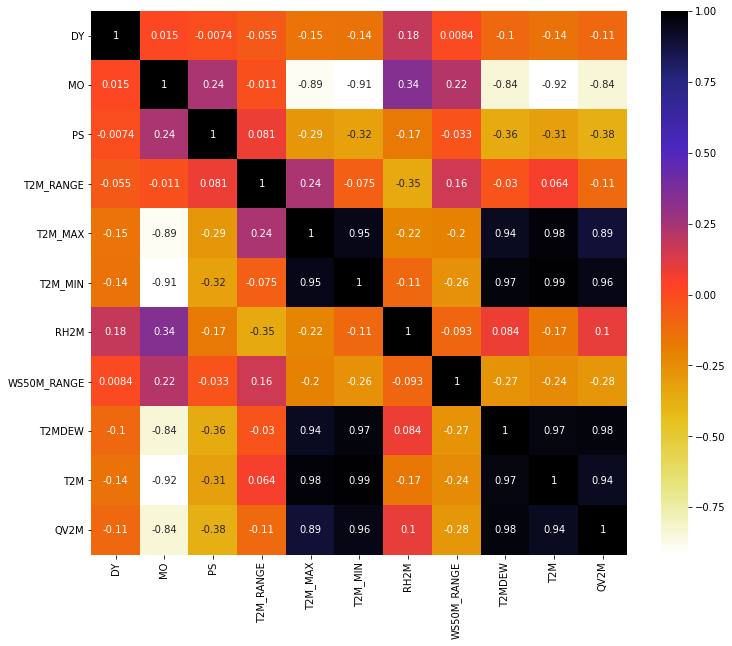

In [45]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [46]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [47]:
#corr_features = correlation(X, 0.7)
#len(set(corr_features))

In [48]:
#X.drop(corr_features,axis=1)

In [49]:
#corr_features

In [50]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression()

In [51]:
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)


0.11466883741235312


In [52]:
U=clf.predict(X_test)
U

array([5.725191  , 2.43869946, 7.0450729 , 5.7375258 , 7.27684497,
       6.73061167, 5.89156108, 5.90142443, 6.80029969, 4.59578308,
       3.38330014, 5.46864017, 6.22304649, 4.70930584, 5.99156621,
       5.13463206, 9.53749683, 6.73769297, 6.42448234, 3.08004712,
       9.51861513, 6.37224658, 6.7414748 , 4.14194324, 4.32503075,
       4.95303618, 5.30579004, 4.83729006, 4.50480515, 6.88479456,
       6.26025182])

In [53]:
y_test

260     6
68      1
148     9
36      6
235     5
83      5
280     3
237     5
52      7
150     7
283     2
136    11
197     7
170     4
99      6
140     6
202     9
81     12
209     2
153     2
193     5
89      9
180     3
224     3
133     3
118     5
1       5
189     5
26      6
34      3
173     1
Name: electric_b, dtype: int64

In [54]:
clf.score(X_test,y_test)

0.11466883741235312

In [55]:
from sklearn.model_selection import KFold # import KFold
#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
#y = np.array([1, 2, 3, 4]) # Create another array
#X = modified.drop(['PS','electric_b','count'], 1)
#y = modified['electric_b']
kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

KFold(n_splits=5, random_state=None, shuffle=False)


KFold(n_splits=5, random_state=None, shuffle=False)

In [56]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [57]:
# Perform 6-fold cross validation
cv_4_results = cross_val_score(clf, X, y, cv=25,)
cv_4_results = abs(cv_4_results)
print ('Cross-validated scores:', abs(cv_4_results))
#print('mean score', mean(cv_4_results))


Cross-validated scores: [0.06404943 0.16615422 2.65658972 0.32798301 0.13585207 0.10267426
 0.20146939 0.20924516 0.05725124 0.0549926  0.3721422  0.37181654
 0.47337858 0.54347312 0.01351708 0.16839913 1.43748287 0.05885005
 0.29633359 0.16911003 0.29286823 3.17878117 0.13340614 0.02576226
 1.16044438]


In [58]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

In [59]:

X = modified.drop(['electric_b'], 1)
y = modified['electric_b']

In [60]:
index = modified.index
number_of_rows = len(index)
number_of_rows

152

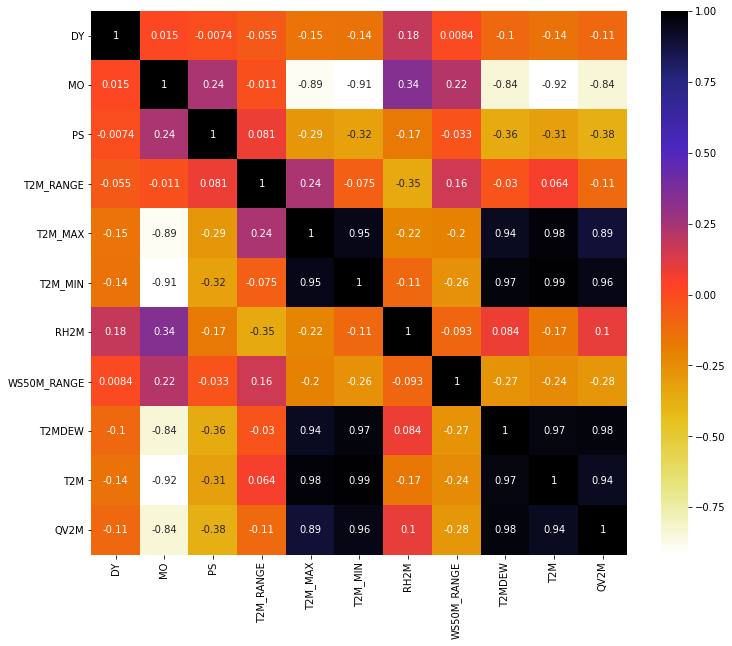

In [61]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [62]:

X = np.array(X)
y = np.array(y)

In [63]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression()

In [64]:
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

In [65]:
y_pred = clf.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleLR1=np.sqrt(msle)
print('RMLSE for the data:',rmsleLR1)

RMLSE for the data: 0.39076206697782573


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['electric_b'], 1))
  y_train = np.array(x['electric_b'])
  X_test = np.array(y.drop(['electric_b'], 1))
  y_test = np.array(y['electric_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  mse_reg=np.sqrt(mse_reg)
  rmsleRF=np.sqrt(mse_reg)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
LinearRegression_max_e1 = np.max(ls)
LinearRegression_e1 = np.mean(ls)
mean_mse_LinearRegression_e1 = np.mean(mse_reg)
LinearRegression_max_e1

4.155426444550552

In [68]:
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
confidence = regressor.score(X_test, y_test)


In [69]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleDT1=np.sqrt(msle)
print('RMLSE for the data:',rmsleDT1)

RMLSE for the data: 0.9768931274412289


In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['electric_b'], 1))
  y_train = np.array(x['electric_b'])
  X_test = np.array(y.drop(['electric_b'], 1))
  y_test = np.array(y['electric_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = DecisionTreeRegressor(random_state=0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  mse_reg=np.sqrt(mse_reg)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
Decision_tree_max_e1 = np.max(ls)
Decision_tree_e1 = np.mean(ls)
mean_mse_Decision_tree_e1 = np.mean(mse_reg)
Decision_tree_max_e1

1.404812652233932

In [71]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [72]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleRF1=np.sqrt(msle)
print('RMLSE for the data:',rmsleRF1)

RMLSE for the data: 0.6314469087492984


In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['electric_b'], 1))
  y_train = np.array(x['electric_b'])
  X_test = np.array(y.drop(['electric_b'], 1))
  y_test = np.array(y['electric_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = RandomForestRegressor(n_estimators=10, random_state=20)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  mse_reg=np.sqrt(mse_reg)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
Random_forest_max_e1 = np.max(ls)
Random_regression_e1 = np.mean(ls)
mean_mse_forest_e1 = np.mean(mse_reg)
Random_forest_max_e1

1.2377280983025623

In [74]:
# Load libraries
from sklearn.ensemble import AdaBoostRegressor
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
X = modified.drop(['electric_b'], 1)
y = modified['electric_b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
abc = AdaBoostRegressor(random_state=0, n_estimators=100)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
confidence = abc.score(X_test, y_test)

In [75]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleADB1=np.sqrt(msle)
print('RMLSE for the data:',rmsleADB1)

RMLSE for the data: 0.4238459771322847


In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['electric_b'], 1))
  y_train = np.array(x['electric_b'])
  X_test = np.array(y.drop(['electric_b'], 1))
  y_test = np.array(y['electric_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = AdaBoostRegressor(random_state=0, n_estimators=100)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  mse_reg=np.sqrt(mse_reg)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
AdaBoostClassifier_max_e1 = np.max(ls)
AdaBoostClassifier_e1 = np.mean(ls)
mean_mse_AdaBoostClassifier_e1 = np.mean(mse_reg)
AdaBoostClassifier_max_e1

1.4000014333379582

In [77]:
import pandas as pd

cars = {'type': ['Linear Regression', 'Decision Tree','Random Forest','ADA Boost'],
        'RMSLE(Docked Bike)': [rmsleLR,rmsleDT,rmsleRF,rmsleADB],
        'RMSLE(Electric Bike]' : [rmsleLR1,rmsleDT1,rmsleRF1,rmsleADB1]
        }

df = pd.DataFrame(cars, columns = ['type', 'RMSLE(Docked Bike)','RMSLE(Electric Bike]'])
df

,type,RMSLE(Docked Bike),RMSLE(Electric Bike]
0,Linear Regression,0.407708,0.390762
1,Decision Tree,0.761758,0.976893
2,Random Forest,0.623190,0.631447
3,ADA Boost,0.537149,0.423846


In [78]:
# after cross validation
import pandas as pd

cars = {'type': ['Linear Regression', 'Decision Tree','Random Forest','ADA Boost'],
        'RMSLE(Docked Bike)': [LinearRegression_e,Decision_tree_e,Random_regression_e,AdaBoostClassifier_e],
        'RMSLE(Docked Bike)(Max)': [LinearRegression_max_e,Decision_tree_max_e,Random_forest_max_e,AdaBoostClassifier_max_e],
        'Mean MSE(Docked Bike)' : [mean_mse_LinearRegression_e,mean_mse_Decision_tree_e,mean_mse_forest_e,mean_mse_AdaBoostClassifier_e],
        'RMSLE(Electric Bike)' : [LinearRegression_e1,Decision_tree_e1,Random_regression_e1,AdaBoostClassifier_e1],
        'RMSLE(Electric Bike)(Max)' : [LinearRegression_max_e1,Decision_tree_max_e1,Random_forest_max_e1,AdaBoostClassifier_max_e1],
        'Mean MSE(Electric Bike)' : [mean_mse_LinearRegression_e1,mean_mse_Decision_tree_e1,mean_mse_forest_e1,mean_mse_AdaBoostClassifier_e1]
        }

df = pd.DataFrame(cars, columns = ['type', 'RMSLE(Docked Bike)','RMSLE(Docked Bike)(Max)','Mean MSE(Docked Bike)','RMSLE(Electric Bike)','RMSLE(Electric Bike)(Max)','Mean MSE(Electric Bike)'])
df

,type,RMSLE(Docked Bike),RMSLE(Docked Bike)(Max),Mean MSE(Docked Bike),RMSLE(Electric Bike),RMSLE(Electric Bike)(Max),Mean MSE(Electric Bike)
0,Linear Regression,2.293839,4.057943,2.909313,2.289163,4.155426,2.568843
1,Decision Tree,0.692618,0.929203,4.033513,0.655792,1.404813,8.538150
2,Random Forest,0.555437,0.671661,3.506094,0.522906,1.237728,3.642755
3,ADA Boost,0.559531,0.696075,3.347961,0.505629,1.400001,3.698184


In [79]:
modified = df1

In [80]:

X = modified.drop(['docked_b'], 1)
y = modified['docked_b']

In [81]:
X = np.array(X)
y = np.array(y)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=20)

In [83]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=20)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Actual and predicted value of Electric bike")
dfd = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfd

Actual and predicted value of Electric bike


,Actual,Predicted
0,4,5.80
1,7,5.50
2,4,4.85
3,9,5.95
4,7,4.00
5,1,3.80
6,6,4.00
7,4,6.60
8,5,3.00
9,6,4.65


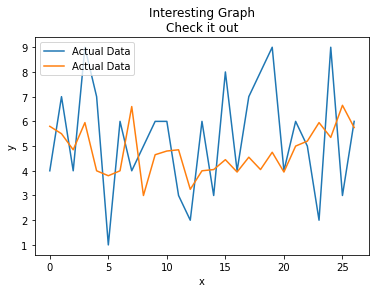

In [84]:
import matplotlib.pyplot as plt
ls = []
for i in range(0,len(dfd)):
  ls.append(i)
plt.plot(ls,dfd['Actual'], label='Actual Data')
plt.plot(ls,dfd['Predicted'], label='Actual Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

In [85]:
modified = df2

In [86]:

X = modified.drop(['electric_b'], 1)
y = modified['electric_b']

In [87]:
X = np.array(X)
y = np.array(y)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=20)

In [89]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=20)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Actual and predicted value of Electric bike")
dfe = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfe

Actual and predicted value of Electric bike


,Actual,Predicted
0,4,3.70
1,5,6.95
2,3,4.45
3,4,4.25
4,6,6.05
5,4,7.20
6,6,7.10
7,3,5.25
8,6,6.25
9,6,5.30


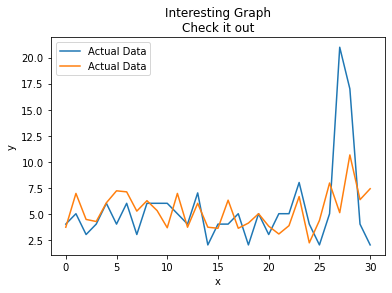

In [90]:
import matplotlib.pyplot as plt
ls = []
for i in range(0,len(dfe)):
  ls.append(i)
plt.plot(ls,dfe['Actual'], label='Actual Data')
plt.plot(ls,dfe['Predicted'], label='Actual Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()